In [35]:
#Read libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [36]:
data_set = pd.read_csv('Task3 - dataset - HIV RVG.csv')
data_set

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2,Participant Condition
0,1,1,1,0.600099,2.141185,0.774660,1.156788,0.896118,Patient
1,1,2,1,0.822612,1.835858,0.906980,1.003627,0.910269,Patient
2,1,3,1,0.862658,1.770032,0.928794,0.974819,0.905406,Patient
3,1,4,1,0.807950,1.373153,0.898860,0.871498,0.783355,Patient
4,1,5,1,0.742544,1.332164,0.861710,0.874353,0.753439,Patient
...,...,...,...,...,...,...,...,...,...
3209,203,3,2,0.180108,1.133420,0.424391,0.980019,0.415912,Patient
3210,203,4,2,0.791548,1.386333,0.889690,0.879670,0.782633,Patient
3211,203,5,2,0.232715,1.190652,0.482406,0.982791,0.474104,Patient
3212,203,6,2,0.746027,1.183473,0.863729,0.823292,0.711101,Patient


Section 3.1: Data import, summary, pre-processing and visualisation

In [56]:
data_set.groupby("Participant Condition").std() # standard deviations

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
Participant Condition,,,,,,,,
Control,53.059494,4.027929,0.497380,0.262763,0.377500,0.171403,0.128047,0.156512
Patient,57.334283,4.172325,0.491631,0.267580,0.396982,0.174199,0.132727,0.161678


In [57]:
data_set.groupby("Participant Condition").mean() # mean

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
Participant Condition,,,,,,,,
Control,128.557867,6.252926,1.552666,0.615071,1.558109,0.765318,0.982531,0.742884
Patient,87.897971,6.190931,1.591885,0.615520,1.554242,0.764979,0.980486,0.741053


In [39]:
data_set.groupby("Participant Condition").max() #maximum values

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
Participant Condition,,,,,,,,
Control,199,20,2,2.356406,3.376731,1.535059,1.456809,1.246102
Patient,203,25,2,2.350897,3.169293,1.533264,1.467637,1.232208


In [52]:
data_set.groupby("Participant Condition").min() #minimum values 

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
Participant Condition,,,,,,,,
Control,5,1,1,0.131221,0.392472,0.362244,0.489722,0.368800
Patient,1,1,1,0.092770,0.283299,0.304582,0.390920,0.309526


<AxesSubplot:title={'center':'Alpha'}, xlabel='Participant Condition'>

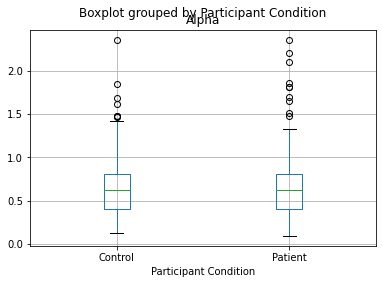

In [58]:
data_set.boxplot(by="Participant Condition", column="Alpha") # Box plot which includes Participant Conditioin x axis and Alpha in y axis

Participant Condition
Control    AxesSubplot(0.125,0.125;0.775x0.755)
Patient    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Beta, dtype: object

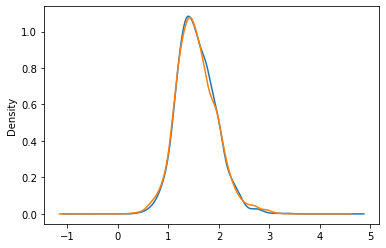

In [67]:
x = data_set.groupby("Participant Condition")  # density plot for the feature Beta 
x["Beta"].plot.density()

Section 3.2 Designing algorithms

In [45]:
#Read libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [73]:
dataset = data_set.values # save all the values in dataset
features = dataset[:,1:-1] # choose all the features except the last one which is the results
results = dataset[:,-1] # save the last column as the results 

In [70]:
normalized_features = preprocessing.normalize(features) # normalizing the features 
normalized_features

array([[0.32131138, 0.32131138, 0.19281852, ..., 0.24890718, 0.37168908,
        0.28793279],
       [0.58456712, 0.29228356, 0.24043604, ..., 0.26509527, 0.29334368,
        0.26605678],
       [0.73832783, 0.24610928, 0.21230821, ..., 0.22858482, 0.23991201,
        0.22282884],
       ...,
       [0.88533471, 0.35413388, 0.04120621, ..., 0.08541813, 0.17401976,
        0.08394816],
       [0.90570123, 0.30190041, 0.11261297, ..., 0.13038003, 0.12427603,
        0.10734078],
       [0.9107706 , 0.26022017, 0.08694158, ..., 0.10635777, 0.134468  ,
        0.10992013]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, results, test_size=0.1, random_state=42) 

In [80]:
X_train

array([[0.80411107, 0.20102777, 0.17663205, ..., 0.18843552, 0.20839176,
        0.19533824],
       [0.89641945, 0.17928389, 0.12058337, ..., 0.14703284, 0.17304647,
        0.14191746],
       [0.89968859, 0.17993772, 0.08904876, ..., 0.1265829 , 0.18595906,
        0.13081881],
       ...,
       [0.91035618, 0.18207124, 0.09374434, ..., 0.13064512, 0.17545802,
        0.12589982],
       [0.37435806, 0.37435806, 0.16594487, ..., 0.24924446, 0.40370984,
        0.26878662],
       [0.91641492, 0.30547164, 0.03139138, ..., 0.06924296, 0.15198715,
        0.06890355]])

In [81]:
y_train

array(['Control', 'Control', 'Patient', ..., 'Control', 'Control',
       'Control'], dtype=object)

In [84]:
accuracy = []
for i in range(200,500,10):
    clf = MLPClassifier(max_iter = i, hidden_layer_sizes = (500, 500), activation = 'logistic',).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

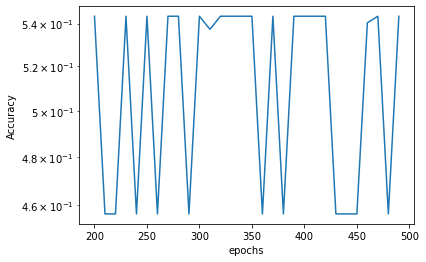

In [90]:
plt.figure();
plt.semilogy(range(200,500,10), accuracy)
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

In [17]:
clf_rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 5).fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.5248447204968945

In [18]:
clf_rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 10).fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.515527950310559

In [91]:
clf_rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 10)
accuracy_set = cross_val_score(clf_rf, normalized_features,results, cv =10 )

In [94]:
accuracy_set.mean()

0.5021835877788743

In [95]:
clf_rf = RandomForestClassifier(n_estimators = 5000, min_samples_leaf = 10)
accuracy_set = cross_val_score(clf_rf, normalized_features,results, cv =10 )

In [22]:
accuracy_set.mean()

0.5090429751746289

In [23]:
clf_rf = RandomForestClassifier(n_estimators = 10000, min_samples_leaf = 10)
accuracy_set = cross_val_score(clf_rf, normalized_features,results, cv =10 )

In [24]:
accuracy_set.mean()

0.5034432383274317

In [25]:
clf = MLPClassifier(max_iter = 50, hidden_layer_sizes = (50, 50), activation = 'logistic')
accuracy_set = cross_val_score(clf, normalized_features,results, cv =10 )

In [26]:
accuracy_set.mean()

0.5214682378436949

In [27]:
clf = MLPClassifier(max_iter = 500, hidden_layer_sizes = (500, 500), activation = 'logistic')
accuracy_set =cross_val_score(clf, normalized_features,results, cv =10 )

In [28]:
accuracy_set.mean()

0.5127454964106732

In [29]:
clf = MLPClassifier(max_iter = 1000, hidden_layer_sizes = (1000, 1000), activation = 'logistic')
accuracy_set =cross_val_score(clf, normalized_features,results, cv =10 )

In [30]:
accuracy_set.mean()

0.5171204117567385